In [5]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import glob

In [6]:
#cd into public directory with the data
%cd
%cd public/data

#Imports the .csv files into usable lists
helium = np.genfromtxt('Helium.csv', delimiter = ',', skip_header = 53, skip_footer = 1)
hydrogen = np.genfromtxt('Hydrogen.csv', delimiter = ',', skip_header = 53, skip_footer = 1)

/home/acardaras
/home/acardaras/public/data


**Importing the data that we took**

In [7]:
#cd into directory with our data
%cd
%cd Lab2/Our_Data

#Imports data
bias_50 = np.genfromtxt('Bias_50ms.csv', delimiter = ',', skip_header = 53, skip_footer = 1)
bias_100 = np.genfromtxt('Bias_100ms.csv', delimiter = ',', skip_header = 53, skip_footer = 1)
bias_150 = np.genfromtxt('Bias_150ms.csv', delimiter = ',', skip_header = 53, skip_footer = 1)
bias_200 = np.genfromtxt('Bias_200ms.csv', delimiter = ',', skip_header = 53, skip_footer = 1)
bias_400 = np.genfromtxt('Bias_400ms.csv', delimiter = ',', skip_header = 53, skip_footer = 1)
bias_750 = np.genfromtxt('Bias_750ms.csv', delimiter = ',', skip_header = 53, skip_footer = 1)

desk_lamp_100 = np.genfromtxt('Desk_Lamp_100ms.csv', delimiter = ',', skip_header = 53, skip_footer = 1)
desk_lamp_150 = np.genfromtxt('Desk_Lamp_150ms.csv', delimiter = ',', skip_header = 53, skip_footer = 1)
desk_lamp_200 = np.genfromtxt('Desk_Lamp_200ms.csv', delimiter = ',', skip_header = 53, skip_footer = 1)

flourescent_bulb_50 = np.genfromtxt('Flourescent_Bulb_50.csv', delimiter = ',', skip_header = 53, skip_footer = 1)
flourescent_bulb_100 = np.genfromtxt('Flourescent_Bulb_100.csv', delimiter = ',', skip_header = 53, skip_footer = 1)
flourescent_bulb_150 = np.genfromtxt('Flourescent_Bulb_150.csv', delimiter = ',', skip_header = 53, skip_footer = 1)
flourescent_bulb_200 = np.genfromtxt('Flourescent_Bulb_200.csv', delimiter = ',', skip_header = 53, skip_footer = 1)

helium_50 = np.genfromtxt('Helium_50ms.csv', delimiter = ',', skip_header = 53, skip_footer = 1)

hydrogen_50 = np.genfromtxt('Hydrogen_50ms.csv', delimiter = ',', skip_header = 53, skip_footer = 1)
hydrogen_150 = np.genfromtxt('Hydrogen_150ms.csv', delimiter = ',', skip_header = 53, skip_footer = 1)

mercury_50 = np.genfromtxt('Mercury_50ms.csv', delimiter = ',', skip_header = 53, skip_footer = 1)
mercury_100 = np.genfromtxt('Mercury_100ms.csv', delimiter = ',', skip_header = 53, skip_footer = 1)
mercury_150 = np.genfromtxt('Mercury_150ms.csv', delimiter = ',', skip_header = 53, skip_footer = 1)
mercury_200 = np.genfromtxt('Mercury_200ms.csv', delimiter = ',', skip_header = 53, skip_footer = 1)
mercury_400 = np.genfromtxt('Mercury_400ms.csv', delimiter = ',', skip_header = 53, skip_footer = 1)
mercury_750 = np.genfromtxt('Mercury_750ms.csv', delimiter = ',', skip_header = 53, skip_footer = 1)

neon_50 = np.genfromtxt('Neon_50ms.csv', delimiter = ',', skip_header = 53, skip_footer = 1)
neon_100 = np.genfromtxt('Neon_100ms.csv', delimiter = ',', skip_header = 53, skip_footer = 1)


/home/acardaras
/home/acardaras/Lab2/Our_Data


**Defining Functions**

In [8]:
def centroid(data, threshold):                #Function to find the centroids of the data, takes in an array of data as well as what you want the threshold to be
    if np.shape(data) == (3648, 2):           #Goes through this if statement for the given hydrogen / helium data
        wavelength = data[:,0]
        intensity = data[:,1]
    else:                                     #Else it goes through here for the arc data
        wavelength = data[0]
        intensity = data[1]
    width = []
    counter = 0
    index = np.where(intensity>threshold)      #Finds where in the array the intensity of the light is greater than this value
    index = np.array(index)
    future_index = index + 1                   #Is the same as index, but every element is one larger
    centroid_auto = []                         #Will be filled with all of the centroid values
    
    for j in range(len(index[0,:])):          #For loop that checks if a region of indecies are sequential
        if index[0,j] == future_index[0,j-1]: #if they are then they must be a part of the same peak
            counter += 1
        else:
            if counter > 0:
                width.append(counter)         #Since the variable 'counter' keeps track of the size of each peak, we can append this to 'width' to keep track
            counter = 0                       #of how wide each peak is
    width.append(counter)                     

    index = index[0][:]                       #Changes the data type
    
    
    highlight = []                           #Will be filled with the indexes for each centroid
    for j in range(len(width)):              #For loop that finds the centroid for each sampled region
        temp = []
        numerator = 0
        denominator = 0
        for i in range(width[j]):
            numerator += wavelength[index[i]] * intensity[index[i]]
            denominator += intensity[index[i]]
        for i in range(width[j]+1):
            temp.append(index[0])
            index = np.delete(index,0)       #Removes any indexes that have already been looped over
        highlight.append(temp)
        if denominator == 0:
            denominator = np.NaN             #Prevents divide by zero errors
        centroid_auto.append(numerator / denominator)

    return(centroid_auto,highlight)

def fit(y, x, N):                #Function that finds the Linear Least Squares Fit
    ma = np.array([[np.sum(x**2), np.sum(x)],[np.sum(x), N]])
    mc = np.array([[np.sum(x * y)], [np.sum(y)]])
    mai = np.linalg.inv(ma)
    md = mai @ mc
    mfit = md[0, 0]
    cfit = md[1, 0]
    return(mfit, cfit)

def show_fits(file_name):         #Function that takes in a fits file and plots it
    hdul = fits.open(file_name)
    image = hdul[0].data
    plt.figure(figsize = (25,8))
    plt.imshow(image, origin='lower', cmap='inferno')
    plt.colorbar()
    plt.title(file_name)
    plt.show()
    hdul.close()

def sum_data(file_name, lower, upper):                #Sums the each column of a array within certain rows (lower and upper bounds)
    temp = np.zeros(2112)
    hdu = fits.open(file_name)                          
    data = fits.getdata(file_name)[lower:upper, :]
    for i in range(np.shape(data)[1]):                #Loops through each row of the data
        temp[i] = np.sum(data[:,i])                   #Sums of each column at the current row
    return(temp)

def sum_columns(array):                #Sums the each column of a array within certain rows (lower and upper bounds)
    temp = np.zeros(2112)
    for i in range(np.shape(array)[1]):                #Loops through each row of the data
        temp[i] = np.sum(array[:,i])                   #Sums of each column at the current row
    return(temp)

def median_columns(file_name, lower, upper):          #Function that get the median every column within certain rows (lower and upper bounds) of each bias fits file
    temp = np.zeros(2112)
    hdu = fits.open(file_name)                        #Opens the fits files
    hdr = hdu[0].header                               #Gets the header of the fits file 
    data = fits.getdata(file_name)[lower:upper,:]
    for i in range(np.shape(data)[1]):                #Loops through each row of the data
        temp[i] = np.median(data[:,i])                #Finds the median of each column at the current row
    return(temp)


In [9]:
#spectrum = mercury_400
hydrogen_threshold = 0.01

spectrum = hydrogen_150
all_centroid = centroid(spectrum, hydrogen_threshold)

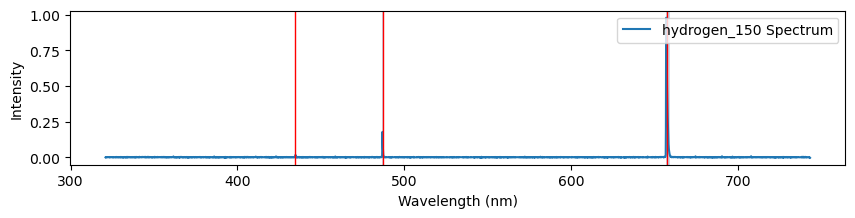

In [10]:
plt.figure(figsize = (10,2))
plt.plot(spectrum[:,0], spectrum[:,1], label = 'hydrogen_150 Spectrum')
for i in range(len(all_centroid[1])):
    plt.axvline(all_centroid[0][i], color='red', linewidth=1)
    plt.axvspan(spectrum[all_centroid[1][i][0],0],spectrum[all_centroid[1][i][-1],0],alpha = .25)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity')
plt.legend(loc = 'upper right')
# plt.xlim(480,490)
plt.show()

**Least Squares Fitting**

slope:  0.9985007810382789
intercept:  -0.25806511664591764


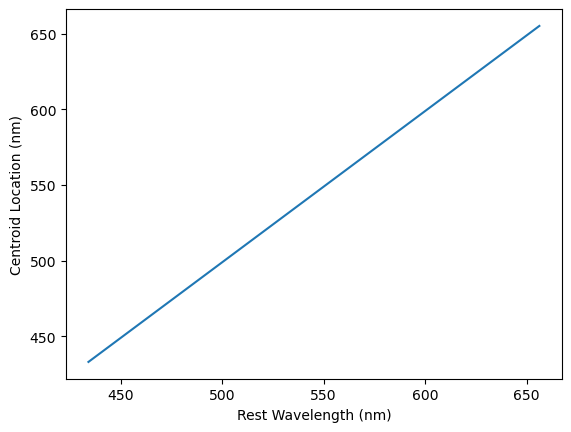

In [45]:
#x = rest wavelength
#y = centroid values
#y = mx + c

x = np.array([434, 486, 656.3])     #Rest wavelengths of hydrogen
y = np.array(all_centroid[0])       #Calculated centroid values of our hydrogen spectrum

least_square = fit(x, y, 3)        #Finds the least square fit, N = 3 because we have 3 rest wavelengths & 3 centroids

#Plot best fit
print('slope: ', least_square[0])
print('intercept: ', least_square[1])
plt.plot(x, least_square[0] * x + least_square[1])
plt.xlabel('Rest Wavelength (nm)')
plt.ylabel('Centroid Location (nm)')
plt.show()

**Error Propagation to Linear Least-Squares**

In [12]:
std = (1/(3-2)*np.sum(y - (least_square[0]*x+least_square[1]))**2)**.5      #Uses the given error propagation equation in the lab manual to find the standard deviation from the fit

print('Deviations from the fit: ', std)

Deviations from the fit:  6.279539131875765


**Reducing long-slit spectroscopy**

In [18]:
#cd into directory with the lab data
%cd
%cd Lab2/Data

data = glob.glob('*.fits')            #Imports data
data_sorted = sorted(data)            #Sorts the data
b_data = data_sorted[0:61]            #Seperates the b-files from the r-files

/home/acardaras
/home/acardaras/Lab2/Data


**Reducing the data**

In [108]:
#Selecting file

science = 'b152.fits'       #Choose the fits file
science2 = 'b156.fits'        #Choose the fits file

data_slice = [0,280]

In [109]:
median_bias = []

for file in b_data:
    hdu = fits.open(file)                                    #Opens the fits files
    hdr = hdu[0].header                                      #Gets the header of the fits file 
    if hdr['object'] == 'bias':
        data = fits.getdata(file)
        median_bias.append(data)

median_bias = np.median(median_bias, axis = 0)

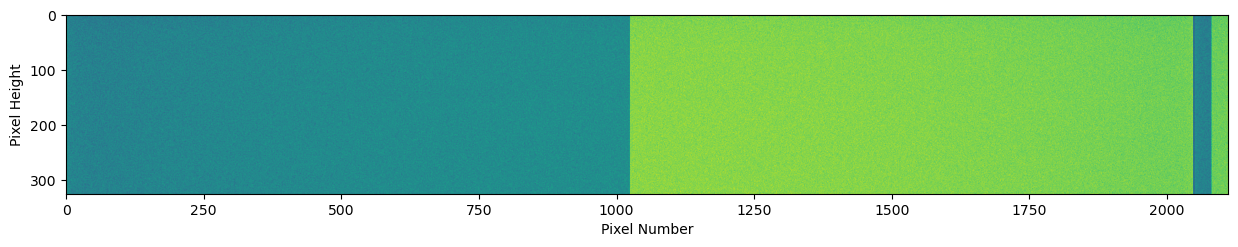

In [110]:
plt.figure(figsize = (15,8))
plt.imshow(median_bias)
plt.xlabel('Pixel Number')
plt.ylabel('Pixel Height')
plt.show()

In [111]:
dome_2arcsec = []              #Will be filled with the sum of the dome 2arcsec files, each row represents a different file that has been summed over
dome_4arcsec = []              #Will be filled with the sum of the dome 4arcsec files, each row represents a different file that has been summed over
dome_data_slice = [20,320]

for file in b_data:                       #Loops through all b-files
    hdu = fits.open(file)                 #Opens the fits files
    hdr = hdu[0].header                   #Gets the header of the fits file 
    if hdr['object'] == 'DomeFlat 2arcsec slit':                   #Checks if the fits file is a 2arcsec dome flat file
        data = fits.getdata(file)
        dome_2arcsec.append(data)
    if hdr['object'] == 'DomeFlat 4arcsec slit':                   #Checks if the fits file is a 4arcsec dome flat file
        data = fits.getdata(file)
        dome_4arcsec.append(data)


median_dome_2arcsec = np.median(dome_2arcsec, axis = 0)            #Finds the median each 2arcsec dome flat file, and compresses it into a 1D list
median_dome_4arcsec = np.median(dome_4arcsec, axis = 0)            #Finds the median each 4arcsec dome flat file, and compresses it into a 1D list


In [112]:
flat_normalized_2arcsec = (median_dome_2arcsec - median_bias)/np.median(median_dome_2arcsec - median_bias) #Finds the normalizes the 2arcsec dome flat 
flat_normalized_4arcsec = (median_dome_4arcsec - median_bias)/np.median(median_dome_4arcsec - median_bias) #Finds the normalizes the 4arcsec dome flat 

In [113]:
for i in range(len(flat_normalized_2arcsec[0])):
    for j in range(len(flat_normalized_2arcsec)):
        if flat_normalized_2arcsec[j][i] == 0:
            flat_normalized_2arcsec[j][i] = np.NaN
            
for i in range(len(flat_normalized_4arcsec[0])):
    for j in range(len(flat_normalized_4arcsec)):
        if flat_normalized_4arcsec[j][i] == 0:
            flat_normalized_4arcsec[j][i] = np.NaN

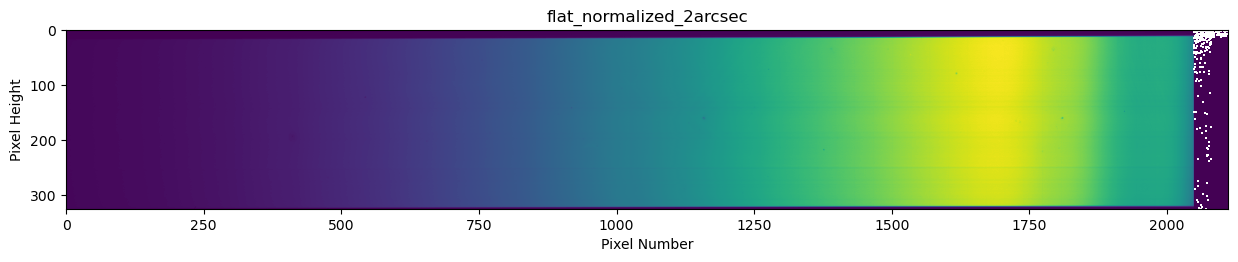

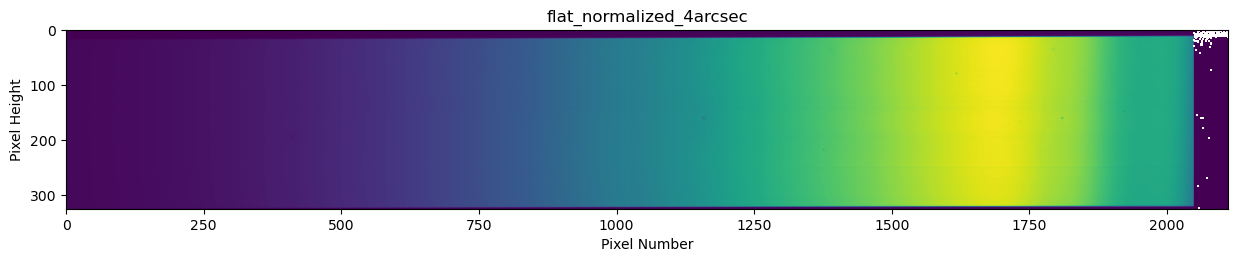

In [114]:
plt.figure(figsize = (15,8))
plt.imshow(flat_normalized_2arcsec)
plt.title('flat_normalized_2arcsec')
plt.xlabel('Pixel Number')
plt.ylabel('Pixel Height')
plt.show()

plt.figure(figsize = (15,8))
plt.imshow(flat_normalized_4arcsec)
plt.title('flat_normalized_4arcsec')
plt.xlabel('Pixel Number')
plt.ylabel('Pixel Height')
plt.show()

**Science Data**

In [115]:
hdu = fits.open(science)
hdr = hdu[0].header
data = fits.getdata(science)

hdu2 = fits.open(science2)
hdr2 = hdu[0].header
data2 = fits.getdata(science2)


if hdr['slit_n'] == '2.0 arcsec':
    reduced_science = (data - median_bias) / flat_normalized_2arcsec
    reduced_science2 = (data2 - median_bias) / flat_normalized_2arcsec
else:
    reduced_science = (data - median_bias) / flat_normalized_4arcsec
    reduced_science2 = (data2 - median_bias) / flat_normalized_4arcsec

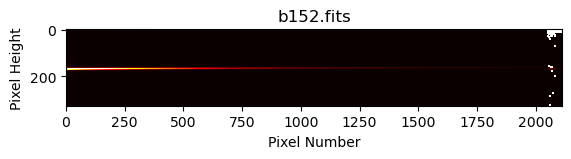

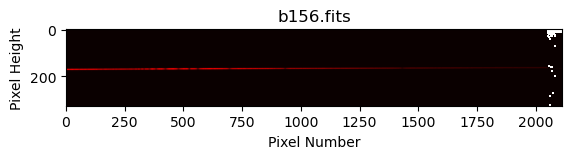

In [116]:
plt.imshow(reduced_science,vmin = 0, vmax = 100000, cmap = 'hot')
plt.title('b152.fits')
plt.xlabel('Pixel Number')
plt.ylabel('Pixel Height')
plt.show()
plt.imshow(reduced_science2,vmin = 0, vmax = 100000, cmap = 'hot')
plt.title('b156.fits')
plt.xlabel('Pixel Number')
plt.ylabel('Pixel Height')
plt.show()

In [117]:
science_1d = np.sum(reduced_science[161:170], axis = 0)

In [118]:
x = np.linspace(0, 2112, 2112)

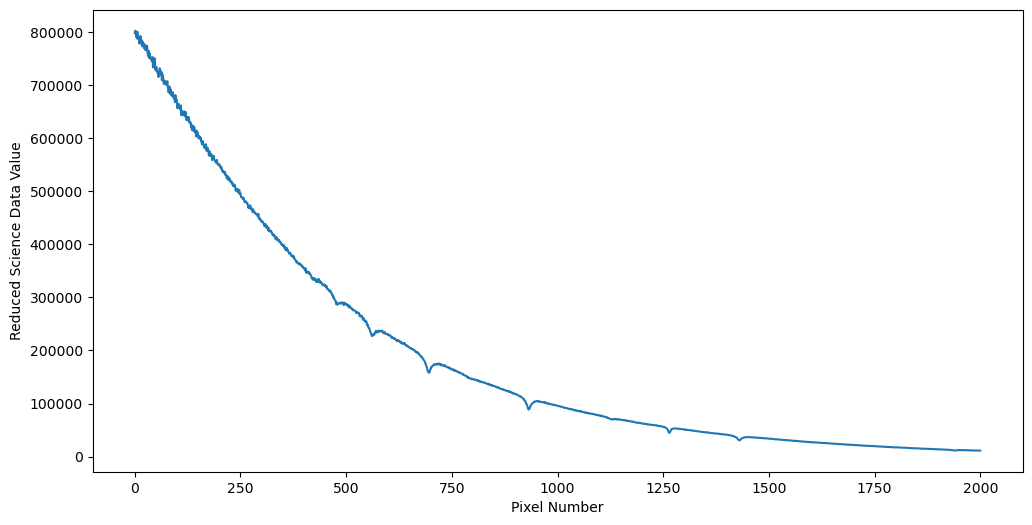

In [119]:
plt.figure(figsize = (12,6))
plt.plot(x[0:2000], science_1d[0:2000])
plt.xlabel('Pixel Number')
plt.ylabel('Reduced Science Data Value')
plt.show()

In [120]:
arc = 'b100.fits'          # 2arcsec



hdu = fits.open(arc)
hdr = hdu[0].header
arc_data = fits.getdata(arc)
median_arc = np.median(arc_data, axis = 0)
if hdr['slit_n'] == '2.0 arcsec':
    reduced_arc = (median_arc - median_bias)
else:
    reduced_arc = (median_arc - median_bias)

arc_1d = np.sum(reduced_arc[161:170], axis = 0)

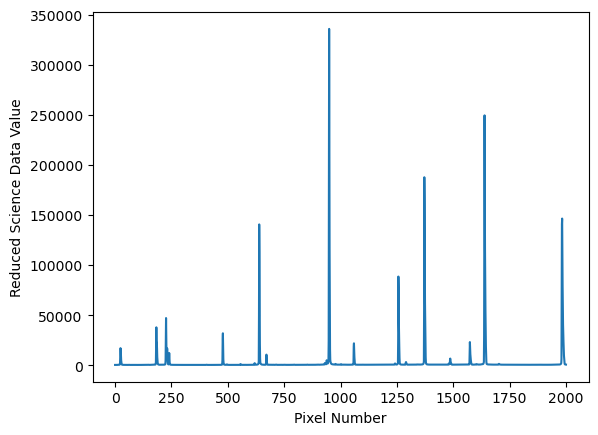

In [121]:
plt.plot(x[0:2000], arc_1d[0:2000])
plt.xlabel('Pixel Number')
plt.ylabel('Reduced Science Data Value')
plt.show()

In [122]:
pixels = np.linspace(0,2000, 2000)        


arc_array =  np.zeros((2,2000))
arc_array[0] = pixels
arc_array[1] = arc_1d[0:2000]

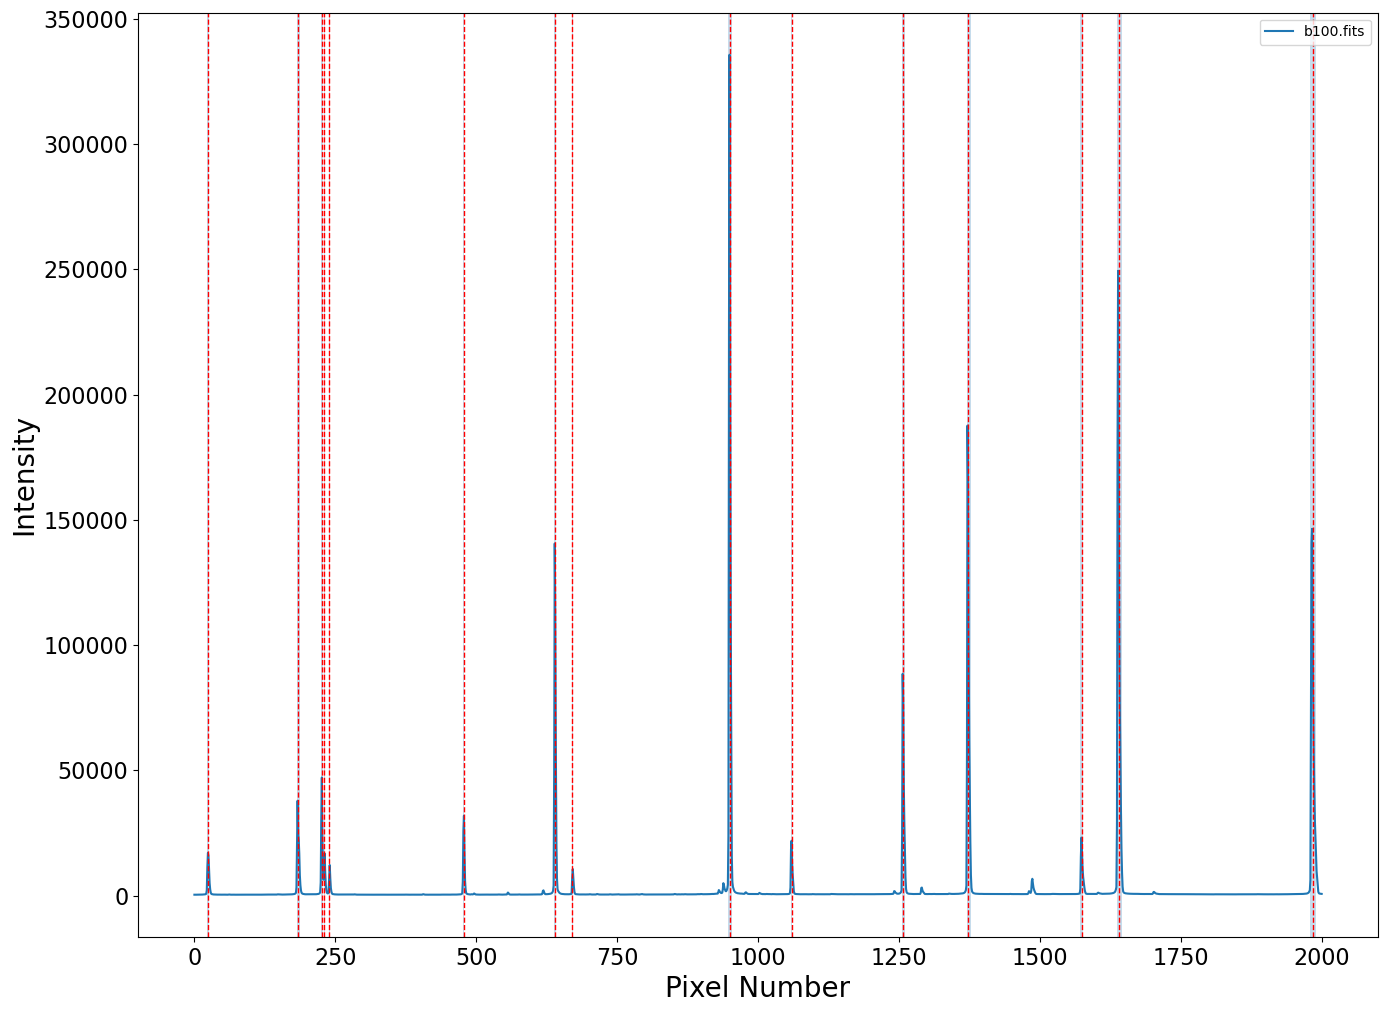

In [123]:
# arc_threshold = 10001     #Dividing by flat normalized
arc_threshold = 7001      #Not dividing by flat normalized

arc_centroid = centroid(arc_array, arc_threshold)

plt.figure(figsize = (16,12))
plt.plot(x[0:2000], arc_1d[0:2000], label = arc)
for i in range(len(arc_centroid[1])):
    plt.axvline(arc_centroid[0][i], linestyle='dashed', color='red', linewidth=1)
    plt.axvspan(arc_centroid[1][i][0],arc_centroid[1][i][-1],alpha = .25)
plt.xlabel('Pixel Number', fontsize=20)
plt.ylabel('Intensity',fontsize=20)
plt.xticks(fontsize=16)  # Sets x-axis tick label font size
plt.yticks(fontsize=16)  # Sets y-axis tick label font size
plt.legend(loc = 'upper right')
#plt.xlim(150,1750)
plt.show()

slope:  0.10439362775066233
intercept:  337.1443702886995
equation of fit:  y =  0.10439362775066233 x + 337.1443702886995


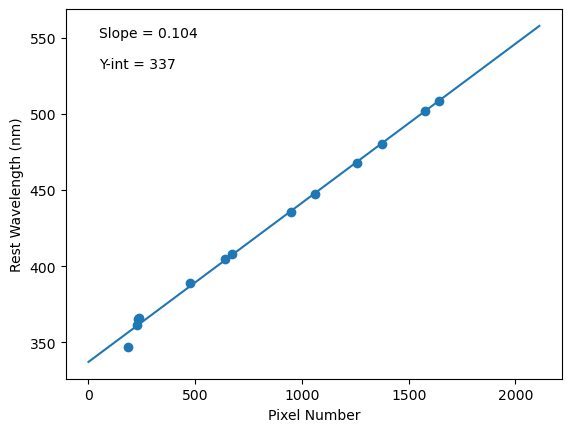

In [124]:
#Rest wavelength values from the kast website
arc_rest_wavelengths = np.array([346.655, 361.051, 365.015,
                                 366.288, 388.865, 404.656, 407.783, 435.833,
                                 447.150, 467.816, 479.992, 501.568, 508.582])

arc_centroid_array = np.array(arc_centroid[0])                          #Calculated centroid values of our hydrogen spectrum

least_square = fit(arc_rest_wavelengths, arc_centroid_array[1:14], 13)        #Finds the least square fit, N = 13 because we have 13 rest wavelengths & 13 centroids

print('slope: ', least_square[0])
print('intercept: ', least_square[1])
print('equation of fit: ', 'y = ', least_square[0], 'x +', least_square[1]) 
#Plot best fit
plt.plot(x, least_square[0] * x + least_square[1])
plt.scatter(arc_centroid_array[1:14], arc_rest_wavelengths)
plt.xlabel('Pixel Number')
plt.ylabel('Rest Wavelength (nm)')
plt.text(50, 550, r'Slope = 0.104')
plt.text(50, 530, r'Y-int = 337')
plt.show()
#plt.xlim(325,500)
#plt.ylim(300,600)


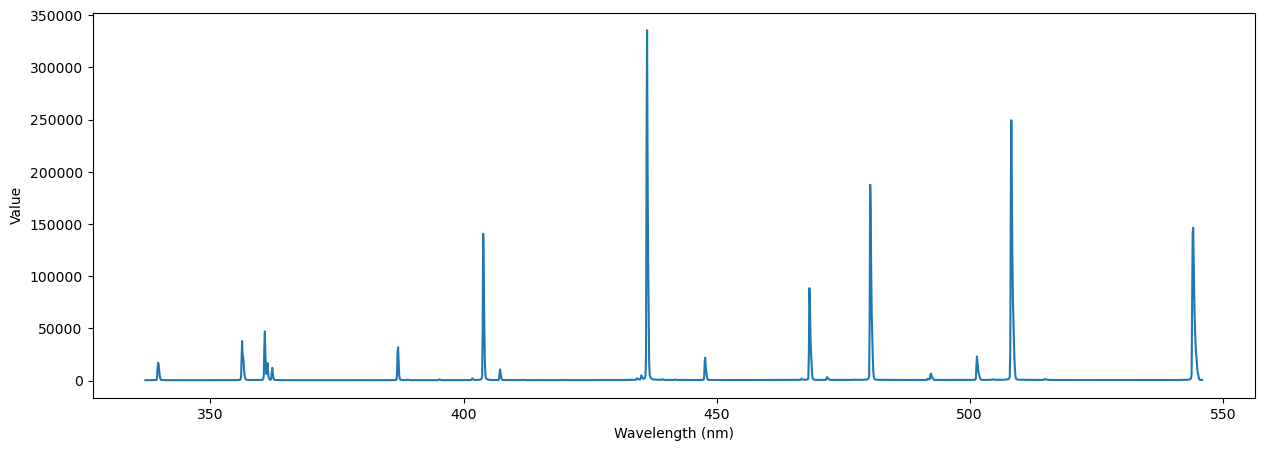

In [125]:
wavelength_fit = np.zeros(2112)
for i in range(len(x)):
    wavelength_fit[i] = x[i] * least_square[0] + least_square[1]

plt.figure(figsize = (15,5))
plt.plot(wavelength_fit[0:2000], arc_1d[0:2000], label = arc)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Value')
plt.show()

In [126]:
test = np.zeros((2,2000))
test[0] = wavelength_fit[0:2000]
test[1] = arc_1d[0:2000]

In [127]:
arc_centroid_pixels = centroid(test, arc_threshold)

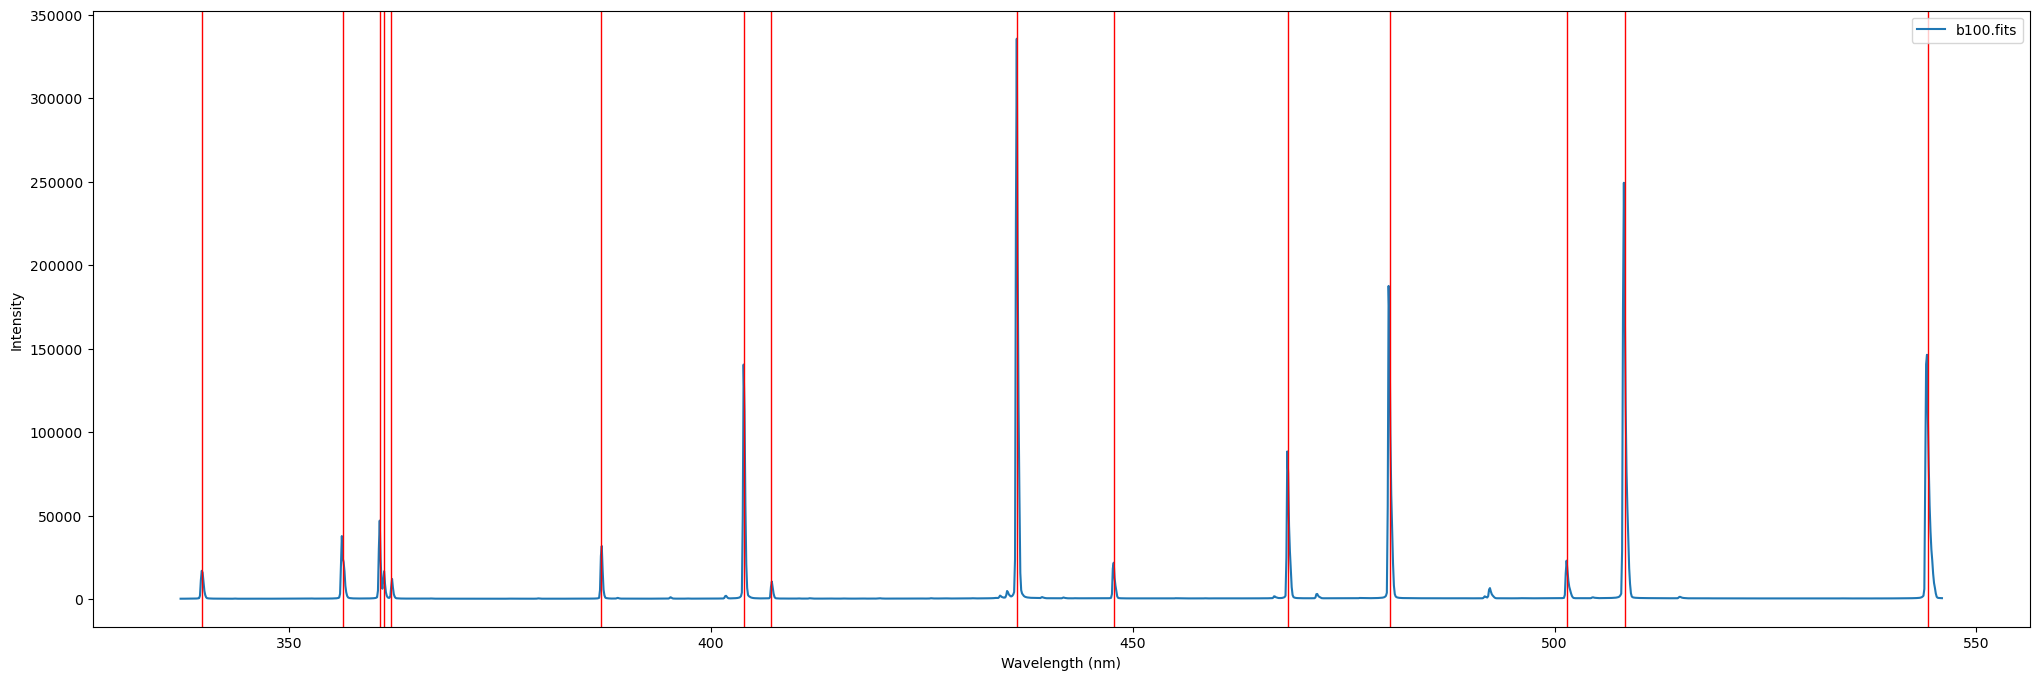

In [128]:
plt.figure(figsize = (25,8))
plt.plot(wavelength_fit[0:2000], arc_1d[0:2000], label = arc)
for i in range(len(arc_centroid_pixels[1])):
    plt.axvline(arc_centroid_pixels[0][i], color='red', linewidth=1)
    #plt.axvspan(arc_centroid[1][i][0],arc_centroid[1][i][-1],alpha = .25)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity')
plt.legend(loc = 'upper right')
# plt.xlim(330,370)
plt.show()

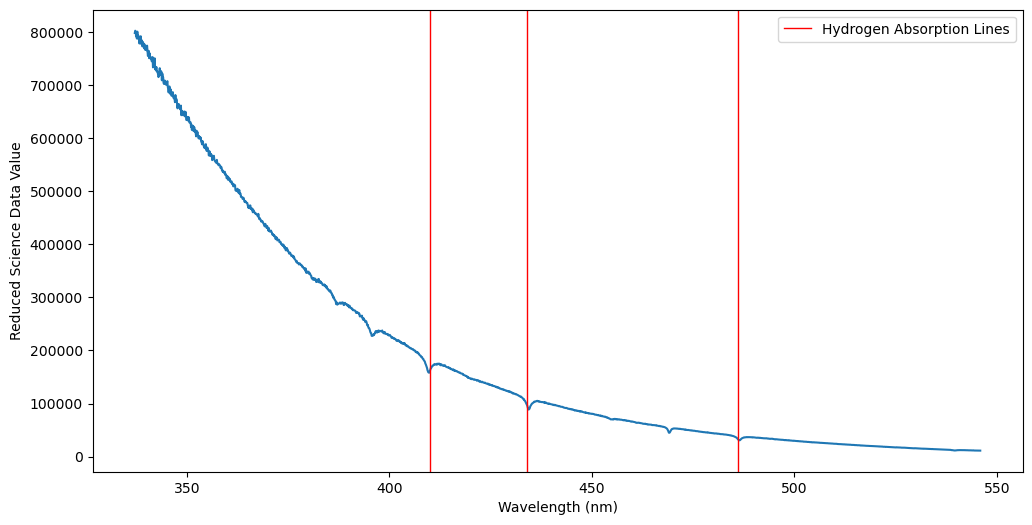

In [129]:
plt.figure(figsize = (12,6))
plt.plot(wavelength_fit[0:2000], science_1d[0:2000])
plt.axvline(410, color='r', linewidth=1, label = 'Hydrogen Absorption Lines')
plt.axvline(434, color='r', linewidth=1)
plt.axvline(486, color='r', linewidth=1)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Reduced Science Data Value')
plt.legend(loc = 'upper right')
plt.show()